In [1]:
## Dingyi Kang
## A20308046
## Assignment1 - problem 3

import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
xFilePath = '/content/drive/My Drive/x_train.npy'
yFilePath = '/content/drive/My Drive/y_train.npy'
xTestFilePath = '/content/drive/My Drive/x_test.npy'
yTestFilePath = '/content/drive/My Drive/y_test.npy'

In [67]:
# root function to general locally weighted regression model
def locallyWeightedRegression(X, Y, tau):
    # get number of rows of X
    r= np.shape(X)[0]
    #initiate an empty array with size of number of rows of X
    Y_Pred = np.zeros(r)
    #gererate and assign esitmated value for each x
    for i in range(r):
        Y_Pred[i] = X[i] * localWeight(X[i], X, Y, tau)
    return Y_Pred

# function to generate local weight of each trainning x point
def localWeight(point, X, Y, tau):
    # get weight matrix
    wt = kernel(point, X, tau)
    # apply weight matrix in below formula to get the Theta
    theta = (X.T * wt * X).I * (X.T * wt * Y.T)
    return theta

# function to compute weight matrix
def kernel(point, X, tau):
    m = np.shape(X)[0]
    # inititate a m*m identity matrix
    weights = np.mat(np.eye((m)))
    # compute and assign weight of this point relative to each point in the diagonal of the matrix
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * tau**2))
    return weights

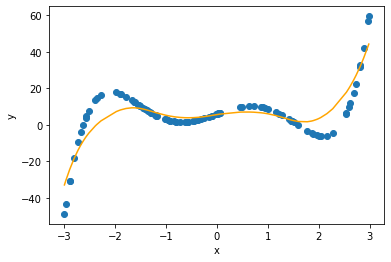

In [68]:
''' load the array data from npy files '''
x = np.load(xFilePath)
y = np.load(yFilePath)
xTs = np.load(xTestFilePath)
yTs = np.load(yTestFilePath)

''' convert the data from array to matrix for ease of matrix operations later '''
xTrain = np.mat(x)
yTrain = np.mat(y)
xTest = np.mat(xTs)
yTest = np.mat(yTs)
#print(xTrain.shape)
#print(xTest.shape)

''' 
add bias column to X with values of 1 to represent constant not variable
create an array with size of m which is number of cloumns the array yTrain (i.e., number of target value y in trainning data)'''
#print(yTrain.shape)
m = np.shape(yTrain)[1]
bias = np.ones((1, m), dtype = int)
#print(bias)
#print(xTrain)

''' horizontal stacking -- namely append xTrain matrix at the end of transpose of bias matrix '''
XTrain = np.hstack((bias.T, xTrain))
#print(X.shape)
#print(X)

''' predicting values using locally weighted regress algorithm  with tau value of 0.5'''
# note: the shape of yTrain is (1, 100) while the shape of XTrain is (100, 2)
pred_y = locallyWeightedRegression(XTrain, yTrain, 0.5)

# making a copy the XTrain data so that when sorting it, we won't lose it 
xsort = XTrain.copy()
xsort.sort(axis=0)
plt.scatter(x, y)
plt.plot(xsort[:, 1], pred_y[XTrain[:, 1].argsort(0)], color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

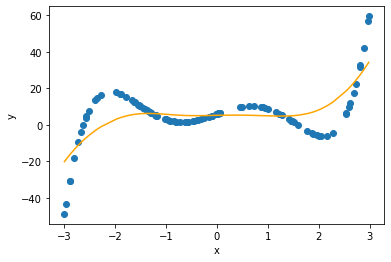

In [79]:
# train the model with tau value of 0.8
pred_y = locallyWeightedRegression(XTrain, yTrain, 0.8)

xsort = XTrain.copy()
xsort.sort(axis=0)
plt.scatter(x, y)
plt.plot(xsort[:, 1], pred_y[XTrain[:, 1].argsort(0)], color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

When increasing value of tau, the fit gets worse

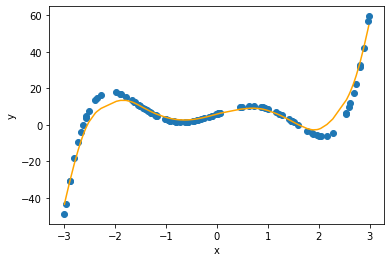

In [45]:
# train the model with tau value of 0.3
pred_y = locallyWeightedRegression(XTrain, yTrain, 0.3)

xsort = XTrain.copy()
xsort.sort(axis=0)
plt.scatter(x, y)
plt.plot(xsort[:, 1], pred_y[XTrain[:, 1].argsort(0)], color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

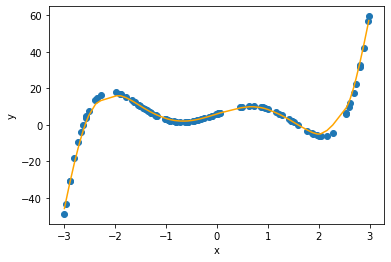

In [83]:
# train the model with tau value of 0.2
pred_y = locallyWeightedRegression(XTrain, yTrain, 0.2)

xsort = XTrain.copy()
xsort.sort(axis=0)
plt.scatter(x, y)
plt.plot(xsort[:, 1], pred_y[XTrain[:, 1].argsort(0)], color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

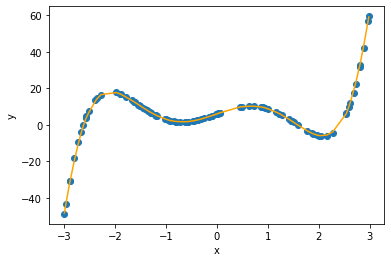

In [81]:
# train the model with tau value of 0.1
pred_y = locallyWeightedRegression(XTrain, yTrain, 0.1)

xsort = XTrain.copy()
xsort.sort(axis=0)
plt.scatter(x, y)
plt.plot(xsort[:, 1], pred_y[XTrain[:, 1].argsort(0)], color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As we can see from above, as tau value get closer to 0, the fit of model gets better and better

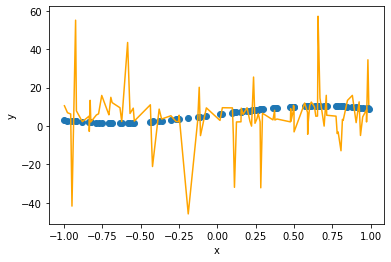

In [84]:
''' we can test the prediction result here using any of the above tau values. All of them don't fit in the test dataset.'''
# then let's test its fit on the testing data set
xsort = xTest.copy()
xsort.sort(axis=0)
#print(xsort)
plt.scatter(xTs, yTs)
plt.plot(xsort, pred_y[xTest.argsort(0)], color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

From the result above, we can see the predictin model based on globally weighted regression with tau of 0.1 is overfitting and thus doesn't fit well in the test dataset.

Answers 1: we don't need any basis functions when implementing locally weighted regression model since it is non-parametric

Answer 2 -- the difference between implementations of parametric linear regression model and that globally weighted regression model: in the implementation of locally weighted regression models, there is no vector of optimal parameters generated. Instead, we get a prediction variable/function. When we want to predict new values using this variable/function, we pass the index of new input to the variable/function and this function will assign weight and estimate target value based on the "position" of the input relative to the positions of training data. In contrast, in the implementation of parametric linear regression model, we get a vector of parameters after training model and apply the parameters to new values when we want to predict target values of new values. In the process prediction, no training data information will be reused.